In [76]:
import pandas as pd
# Load the dataset into a pandas dataframe
df = pd.read_csv("C:/Users/AbhiStyles/Downloads/Telco-Customer-Churn.csv")

In [77]:
#total number of rows and columns
print(df.shape)


(7043, 21)


In [78]:
#Data type of each attribute in the data set
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [79]:
#making the copy of original data set before dropping the customer id column
df1=df.copy()

In [80]:
# Drop the customerID column as it is not relevant for analysis
df = df.drop('customerID', axis=1)


In [81]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [82]:
#converting churn values into 0 and 1
df['Churn'] = df['Churn'].apply(lambda x: 1 if x=='Yes' else 0)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [83]:
print(df['Churn'].value_counts())


0    5174
1    1869
Name: Churn, dtype: int64


In [84]:
# Convert categorical variables into numerical formats using one-hot encoding
df = pd.get_dummies(df, columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'])
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.5,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [85]:
#Converting total charge attribute into float data type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].astype(float)


In [86]:
#checking the total number of missing values in the data set
print(df.isna().sum())


SeniorCitizen                               0
tenure                                      0
MonthlyCharges                              0
TotalCharges                               11
Churn                                       0
gender_Female                               0
gender_Male                                 0
Partner_No                                  0
Partner_Yes                                 0
Dependents_No                               0
Dependents_Yes                              0
PhoneService_No                             0
PhoneService_Yes                            0
MultipleLines_No                            0
MultipleLines_No phone service              0
MultipleLines_Yes                           0
InternetService_DSL                         0
InternetService_Fiber optic                 0
InternetService_No                          0
OnlineSecurity_No                           0
OnlineSecurity_No internet service          0
OnlineSecurity_Yes                

In [87]:
#replacing all the missing values of each column with mean of that column
df = df.fillna(df.mean())
print(df.isna().sum())

SeniorCitizen                              0
tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
gender_Female                              0
gender_Male                                0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBack

In [102]:
# This method fits the scaler to the data and scales the values to be between 0 and 1
#Scale and normalize the features to ensure that they have similar ranges and distributions.
""" The scaled values are then used to replace the original values in the dataframe, 
transforming the original numerical features into scaled numerical features"""
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[num_features] = scaler.fit_transform(df[num_features])
df.shape[1]

46

In [89]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [90]:
pip install xgboost

In [91]:
#Select an appropriate machine learning algorithm such as logistic regression, decision trees, random forests and XGB.
""""To select which is the best model for predicting churn, we will evaluate the model's performance usingmetrics 
such as the accuracy of each model after training it using 70% of the data for training and 30% for testing and
finding an accuracy score at the end for each of the models."""

First, we need to split the dataset into training and testing sets. We will use 70% of the data for training and 30% for testing.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

logreg = LogisticRegression()
tree = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb = xgb.XGBClassifier(random_state=42)


In [92]:
logreg.fit(X_train, y_train)
tree.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [93]:
#Finding accuracy score using metrics below for each of the models
from sklearn.metrics import accuracy_score

models = {'Logistic Regression': logreg,
          'Decision Tree': tree,
          'Random Forest': rf,
          'XGBoost': xgb}

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'{name} accuracy: {acc}')


Logistic Regression accuracy: 0.8204400283889283
Decision Tree accuracy: 0.7154009936124911
Random Forest accuracy: 0.7927608232789212
XGBoost accuracy: 0.7927608232789212


In [94]:
#Based on the accuracy score, we can conclude that logistic regression is the best models for this dataset.
#In above analysis we found out that logistic regression is the best model for the customer churn. Now we will Perform
# the two steps given below using logistic regression:                                                              
# Step1:Now  we will use the above trained logistic model on the training dataset and evaluate its performance on the test dataset.
# Step2: Tune the hyperparameters of the algorithm to optimize its performance.

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8204400283889283
Precision: 0.6863354037267081
Recall: 0.5924932975871313
F1 Score: 0.6359712230215828


In [96]:
#We can use GridSearchCV to tune the hyperparameters of the logistic regression algorithm:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
hyperparameters = {"penalty": ["l1", "l2"],
                   "C": [0.01, 0.1, 1, 10, 100]}



# Create a GridSearchCV object
grid_search = GridSearchCV(logreg, hyperparameters, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the performance of the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
filename = 'logistic_regression_model.joblib'
pickle.dump(lr_model, open(filename, 'wb'))


C:\Users\AbhiStyles\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AbhiStyles\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

Best Hyperparameters: {'C': 100, 'penalty': 'l2'}
Accuracy: 0.8190205819730305
Precision: 0.6820987654320988
Recall: 0.5924932975871313
F1 Score: 0.6341463414634146


C:\Users\AbhiStyles\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AbhiStyles\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the followin

In [173]:
#NOw we test the best model we have created on the new data set to predict the customer churn
New_data=pd.read_csv("C:/Users/AbhiStyles/Downloads/churn_Sample.csv")
New_data_copy=New_data.copy()

#performing data preprocessing steps
New_data = New_data.drop('customerID', axis=1)
New_data['TotalCharges'] = pd.to_numeric(New_data['TotalCharges'], errors='coerce')
New_data['TotalCharges'] = New_data['TotalCharges'].astype(float)
New_data = pd.get_dummies(New_data, columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'])



New_data = New_data.fillna(New_data.mean())
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
New_data[num_features] = scaler.fit_transform(New_data[num_features])



In [174]:
#predicting the churn on the new data set using the best model we have created 
churn_pred=best_model.predict(New_data)
churn_pred

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0], dtype=int64)

In [175]:
#adding the prediction values in the table as an column
New_data_copy['Churn']=churn_pred


In [176]:
#Converting binary values of churn into boolean values 
New_data_copy['Churn'] = New_data_copy['Churn'].astype(bool)

In [177]:
#Final result(Churn in the table)
New_data_copy.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1001-FVZPP,Male,0,Yes,Yes,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,29.85,29.85,True
1,1002-EXLZK,Female,0,No,No,34,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),99.65,3424.25,False
2,1003-ARXIT,Male,1,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,True
3,1004-QJWTD,Male,0,No,No,45,Yes,Yes,Fiber optic,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),104.80,5375.45,False
4,1005-LHNZS,Female,1,No,No,2,Yes,Yes,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,True


In [179]:
New_data_copy.to_csv('C:/Users/AbhiStyles/Downloads/Final_Output_Churn_Telco.csv')

In [180]:
#Run K-Means clustering to identify clusters of customers
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

New_data_clusters=New_data.copy()
New_data_clusters['Churn']=New_data_copy['Churn']
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(New_data_clusters)

#Adding the cluster labels to the original dataset
New_data_copy['Cluster'] = kmeans.labels_

In [181]:
New_data_copy.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Cluster
0,1001-FVZPP,Male,0,Yes,Yes,1,Yes,No,DSL,No,...,No,No,No,Month-to-month,No,Electronic check,29.85,29.85,True,1
1,1002-EXLZK,Female,0,No,No,34,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),99.65,3424.25,False,0
2,1003-ARXIT,Male,1,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,True,1
3,1004-QJWTD,Male,0,No,No,45,Yes,Yes,Fiber optic,No internet service,...,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),104.80,5375.45,False,2
4,1005-LHNZS,Female,1,No,No,2,Yes,Yes,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,True,1


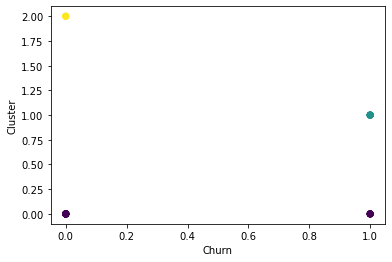

In [182]:
#Visualizing the clustering using a scatter plot for tenure and total charges
plt.scatter(New_data_copy['Churn'], New_data_copy['Cluster'], c=New_data_copy['Cluster'])
plt.xlabel('Churn')
plt.ylabel('Cluster')
plt.show()

In [183]:
#identifying the characteristics of each cluster by calculating the mean values of the variables for each cluster.
New_data_copy.groupby('Cluster').mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
Cluster,,,,,
0,0.030303,37.212121,105.99697,4069.593939,0.242424
1,0.375000,3.875000,61.16875,261.162500,1.000000
2,0.000000,61.000000,114.76250,7260.550000,0.000000


In [184]:
New_data_copy.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Cluster
0,1001-FVZPP,Male,0,Yes,Yes,1,Yes,No,DSL,No,...,No,No,No,Month-to-month,No,Electronic check,29.85,29.85,True,1
1,1002-EXLZK,Female,0,No,No,34,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),99.65,3424.25,False,0
2,1003-ARXIT,Male,1,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,True,1
3,1004-QJWTD,Male,0,No,No,45,Yes,Yes,Fiber optic,No internet service,...,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),104.80,5375.45,False,2
4,1005-LHNZS,Female,1,No,No,2,Yes,Yes,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,True,1


In [157]:
#pip install imblearn


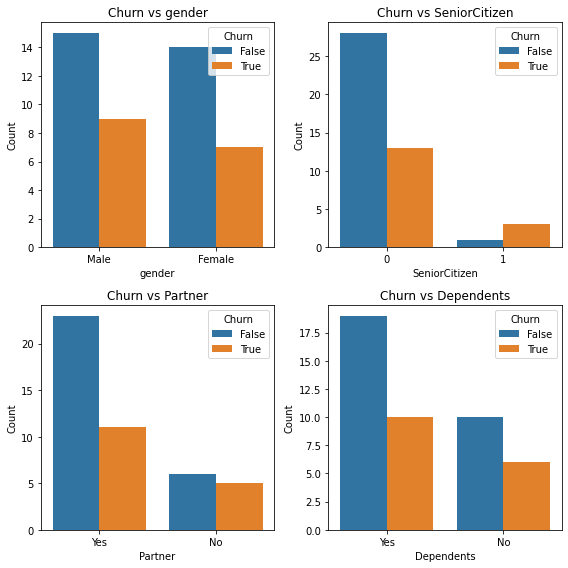

In [185]:
# churn rate based on: gender, seniority, partner and dependents
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.combine import SMOTEENN
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

for i, ax in enumerate(axes.flat):
    if i < len(cols):
        sns.countplot(data=New_data_copy, x=cols[i], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')
        
plt.tight_layout()
plt.show()

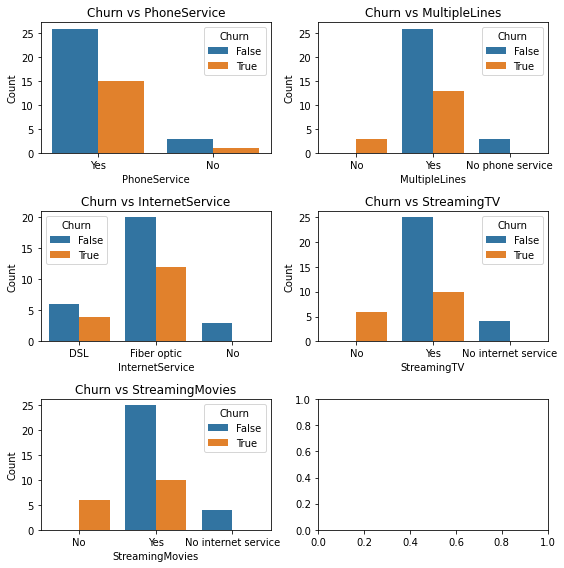

In [186]:
## churn rate based on: 'PhoneService', 'MultipleLines', 'InternetService','StreamingTV', 'StreamingMovies'
services = New_data_copy[['Churn', 'PhoneService', 'MultipleLines', 'InternetService','StreamingTV', 'StreamingMovies']]
cols = services.columns[1:]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8,8))

for i, ax in enumerate(axes.flat):
    if i < len(cols):
        sns.countplot(data=services, x=cols[i], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

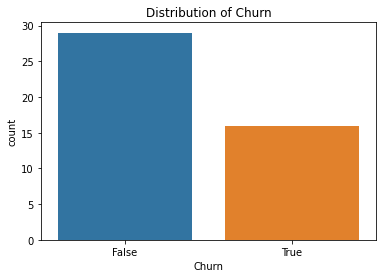

In [187]:
import seaborn as sns

sns.countplot(x='Churn', data=New_data_copy)
plt.title('Distribution of Churn')
plt.show()


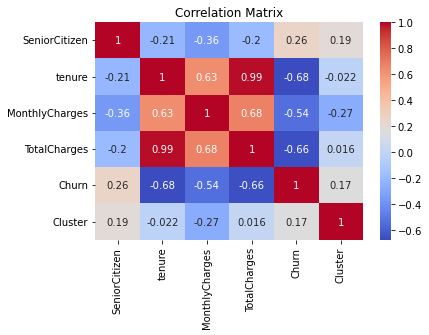

In [188]:
corr = New_data_copy.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()


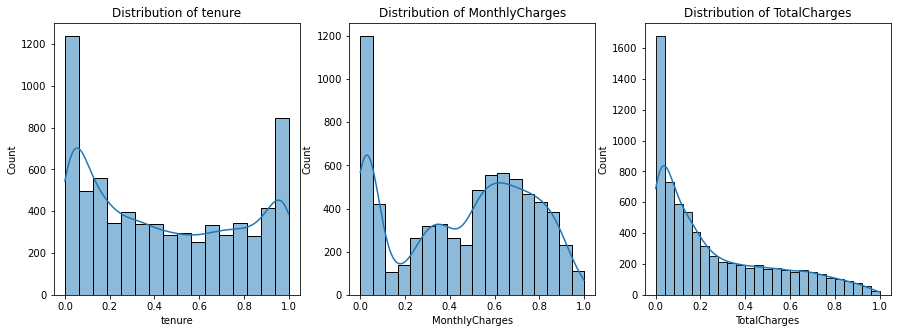

In [189]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(x='tenure', data=df, kde=True, ax=ax[0])
ax[0].set_title('Distribution of tenure')

sns.histplot(x='MonthlyCharges', data=df, kde=True, ax=ax[1])
ax[1].set_title('Distribution of MonthlyCharges')

sns.histplot(x='TotalCharges', data=df, kde=True, ax=ax[2])
ax[2].set_title('Distribution of TotalCharges')

plt.show()


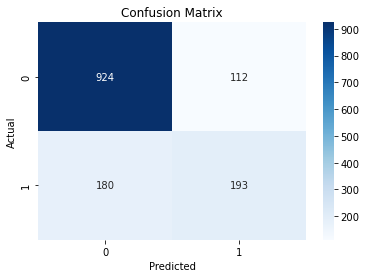

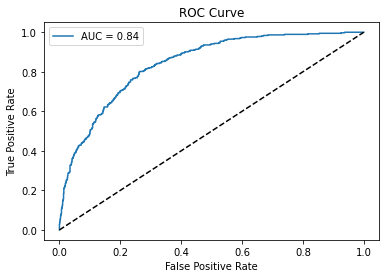

In [190]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# Confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
